# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.


## Problem Statement

We will be exploring the Starbuck’s Dataset which simulates how people make purchasing decisions and how those decisions are influenced by promotional offers.

There are three offers_types that can be sent: buy-one-get-one (BOGO), discount, and informational.

We will create a model that can predict behaviour of customer.

We will analyse the data in the Exploratory Data Analysis part of this section and answer the following bussiness questions related to customer buying behaviour.

1. What is the Gender, Age and Income Distribution of Starbucks Customers?
2. How many customers enrolled yearly?
3. What is the average age of Starbucks Customers?
4. What is the average Income of Starbucks Customers?
5. Which gender has the highest yearly membership?
6. Which gender has the highest annual income?
7. What is the distribution of event in transcripts?
8. What is the percent of trasactions and offers in the event?
9. What are the types of offers : received, views, completed?
10. What is the Income Distribution for the Offer Events?
11. What is the highest completed offer?
12. What is the lowest completed offer?


To compare different classification algorithms we will use [lazypredict](https://lazypredict.readthedocs.io/en/latest/) library.

In [1]:
# Install lazypredict library
!pip install lazypredict

     |████████████████████████████████| 256kB 10.0MB/s 
     |████████████████████████████████| 276kB 22.7MB/s 
     |████████████████████████████████| 127.6MB 59kB/s 
     |████████████████████████████████| 6.8MB 61.7MB/s 
     |████████████████████████████████| 307kB 52.2MB/s 
     |████████████████████████████████| 1.2MB 51.9MB/s 
     |████████████████████████████████| 25.9MB 17.2MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 10.1MB 171kB/s 
     |████████████████████████████████| 14.5MB 50.7MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=54fff1403878398e728c83ea08c8e4c1fb6284d56131ad6e87d548dec29cd2a4
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requireme

## 1.Data Preparing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import seaborn as sns
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

C:\Users\kocak\miniconda3\envs\datascience\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## 2.Data Understanding

In [2]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [3]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.00
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.00
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [4]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [5]:
# rename the id columns
portfolio.rename(columns={"id":"offer_id"}, inplace=True)
profile.rename(columns={"id":"customer_id"}, inplace=True)
transcript.rename(columns={"person":"customer_id"}, inplace=True)

## 3.Data Cleaning
In this part, we will deal with missing values and extreme values.

In [6]:
profile.isna().sum()

gender              2175
age                    0
customer_id            0
became_member_on       0
income              2175
dtype: int64

In [7]:
transcript.isnull().sum()

customer_id    0
event          0
value          0
time           0
dtype: int64

In [8]:
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
offer_id      0
dtype: int64

Only  profile dataframe has missing values.

In [9]:
profile['gender'].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

In [10]:
profile['age'].describe()

count   17000.00
mean       62.53
std        26.74
min        18.00
25%        45.00
50%        58.00
75%        73.00
max       118.00
Name: age, dtype: float64

In [11]:
age_counts = profile['age'].value_counts()
age_counts.sort_index()

18       70
19      135
20      135
21      140
22      131
       ... 
98        5
99        5
100      12
101       5
118    2175
Name: age, Length: 85, dtype: int64

We will drop row in **profile** dataframe if *age* is 118, *gender* and *income* value is nan. 

In [12]:
profile = profile[~((profile.age == 118) & (profile.gender.isnull()) & (profile.income.isnull()))]
profile.head()

,gender,age,customer_id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.00
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.00
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.00
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.00
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.00


In [13]:
profile.isnull().sum()

gender              0
age                 0
customer_id         0
became_member_on    0
income              0
dtype: int64

In [14]:
profile['became_member_on'] = pd.to_datetime(profile.became_member_on, format = '%Y%m%d')
profile['start_year'] = profile.became_member_on.dt.year
profile.head()

,gender,age,customer_id,became_member_on,income,start_year
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.00,2017
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.00,2017
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.00,2018
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.00,2018
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.00,2017


In [15]:
# One-hot encode : channels column
channels = portfolio["channels"].str.join(sep="*").str.get_dummies(sep="*")
    
# One-hot encode : offer_type column
offer_type = pd.get_dummies(portfolio['offer_type'])
    
# Concat one-hot into a portfolio_df
portfolio_df = pd.concat([portfolio, channels, offer_type], axis=1, sort=False)

# Remove channels and offer_type
portfolio = portfolio_df.drop(['channels'], axis=1)
portfolio

,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web,bogo,discount,informational
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,1,0,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,0,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,1,0,0
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,0,1,0
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,0,1,0
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,0,1,0
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,0,0,1
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,1,0,0
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,0,1,0


In [16]:
transcript['value'].apply(lambda x: x.keys()).value_counts()

TypeError: unhashable type: 'dict_keys'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict_keys'


(amount)              138952
(offer id)            134001
(offer_id, reward)     33578
(amount)                   1
(offer_id, reward)         1
(offer id)                 1
Name: value, dtype: int64

We have 3 different keys in *value* column. These are offer_id, amount and reward.

In [17]:
transcript['offer_id'] = transcript['value'].apply(lambda x: x['offer id'] if 'offer id' in x.keys() else x['offer_id'] if "offer_id" in x.keys() else np.nan)
transcript['amount'] = transcript['value'].apply(lambda x: x['amount'] if 'amount' in x.keys() else np.nan)
transcript['reward'] = transcript['value'].apply(lambda x: x['reward'] if 'reward' in x.keys() else np.nan)
transcript.isnull().sum()

customer_id         0
event               0
value               0
time                0
offer_id       138953
amount         167581
reward         272955
dtype: int64

In [18]:
transcript.drop(columns=['value'], inplace=True)
transcript.head()

,customer_id,event,time,offer_id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


### Merge the datasets

In [19]:
# merge the transcript and profile dataframes on customer_id column
transcript = transcript.merge(profile, on=['customer_id'])
# merge the transcript and portfolio  on offer_id column using left join
# To maintain all the offer_ids from the transcript column
transcript = transcript.merge(portfolio, on=['offer_id'], how='left')
transcript.head(2)

,customer_id,event,time,offer_id,amount,reward_x,gender,age,became_member_on,income,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,F,75,2017-05-09,100000.00,...,5.00,7.00,bogo,1.00,1.00,0.00,1.00,1.00,0.00,0.00
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,F,75,2017-05-09,100000.00,...,5.00,7.00,bogo,1.00,1.00,0.00,1.00,1.00,0.00,0.00


### Data Labelling

In [20]:
#Label Encoding the category columns- 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#label encoding - offer_id (10 different IDs) from the portfolio data set
le1 = preprocessing.LabelEncoder()
le1.fit(portfolio.offer_id)
transcript['offer_id'] = le1.fit_transform(transcript['offer_id'].astype(str))


#label encoding - offer_type from the portfolio data set (3 different types, bogo-discount-informational)
le2 = preprocessing.LabelEncoder()
le2.fit(portfolio.offer_type)
transcript['offer_type'] = le2.fit_transform(transcript['offer_type'].astype(str))


# label encoding for gender from the profile data set(4 different types, male-female-other)
le3 = preprocessing.LabelEncoder()
le3.fit(profile.gender)
transcript['gender'] = le3.fit_transform(transcript['gender'].astype(str))

transcript.head(2)

,customer_id,event,time,offer_id,amount,reward_x,gender,age,became_member_on,income,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,6,NaN,NaN,0,75,2017-05-09,100000.00,...,5.00,7.00,0,1.00,1.00,0.00,1.00,1.00,0.00,0.00
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,6,NaN,NaN,0,75,2017-05-09,100000.00,...,5.00,7.00,0,1.00,1.00,0.00,1.00,1.00,0.00,0.00


In [21]:
#To retrive its original value we can use its inverse function
le3.inverse_transform([0,1,2])

array(['F', 'M', 'O'], dtype=object)

In [22]:
le4 = preprocessing.LabelEncoder()
le4.fit(profile.customer_id)
transcript['customer_id'] = le3.fit_transform(transcript['customer_id'].astype(str))
transcript.head()

,customer_id,event,time,offer_id,amount,reward_x,gender,age,became_member_on,income,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
0,6962,offer received,0,6,NaN,NaN,0,75,2017-05-09,100000.00,...,5.00,7.00,0,1.00,1.00,0.00,1.00,1.00,0.00,0.00
1,6962,offer viewed,6,6,NaN,NaN,0,75,2017-05-09,100000.00,...,5.00,7.00,0,1.00,1.00,0.00,1.00,1.00,0.00,0.00
2,6962,transaction,132,10,19.89,NaN,0,75,2017-05-09,100000.00,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6962,offer completed,132,6,NaN,5.00,0,75,2017-05-09,100000.00,...,5.00,7.00,0,1.00,1.00,0.00,1.00,1.00,0.00,0.00
4,6962,transaction,144,10,17.78,NaN,0,75,2017-05-09,100000.00,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
transcript.customer_id.nunique()

14825

* Create a offers dataframe by seperating it from transaction in the event column
* Offer dataframe consist of all the offer types- offer_received, offer_viewed, offer_completed

In [24]:
# Seperate the three offer columns from the transaction column
transaction_df = transcript[transcript.event == "transaction"]
offers_df = transcript[transcript.event != "transaction"]
offers_df.head()

,customer_id,event,time,offer_id,amount,reward_x,gender,age,became_member_on,income,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
0,6962,offer received,0,6,NaN,NaN,0,75,2017-05-09,100000.00,...,5.00,7.00,0,1.00,1.00,0.00,1.00,1.00,0.00,0.00
1,6962,offer viewed,6,6,NaN,NaN,0,75,2017-05-09,100000.00,...,5.00,7.00,0,1.00,1.00,0.00,1.00,1.00,0.00,0.00
3,6962,offer completed,132,6,NaN,5.00,0,75,2017-05-09,100000.00,...,5.00,7.00,0,1.00,1.00,0.00,1.00,1.00,0.00,0.00
5,6962,offer received,168,5,NaN,NaN,0,75,2017-05-09,100000.00,...,0.00,3.00,2,1.00,1.00,1.00,0.00,0.00,0.00,1.00
6,6962,offer viewed,216,5,NaN,NaN,0,75,2017-05-09,100000.00,...,0.00,3.00,2,1.00,1.00,1.00,0.00,0.00,0.00,1.00



## 4. Exploratory Data Analysis
#### Analysis:

1. What is the Gender, Age and Income Distribution of Starbucks Customers?
2. How many customers enrolled yearly?
3. What is the average age of Starbucks Customers?
4. What is the average Income of Starbucks Customers?
5. Which gender has the highest yearly membership?
6. Which gender has the highest annual income?
7. What is the distribution of event in transcripts?
8. What is the percent of trasactions and offers in the event?
9. What are the types of offers : received, views, completed?
10. What is the Income Distribution for the Offer Events?
11. What is the highest completed offer?
12. What is the lowest completed offer?


**Q1**: What is the Gender, Age and Income Distribution of Starbucks Customers?

**Q2**: How many customers enrolled yearly?

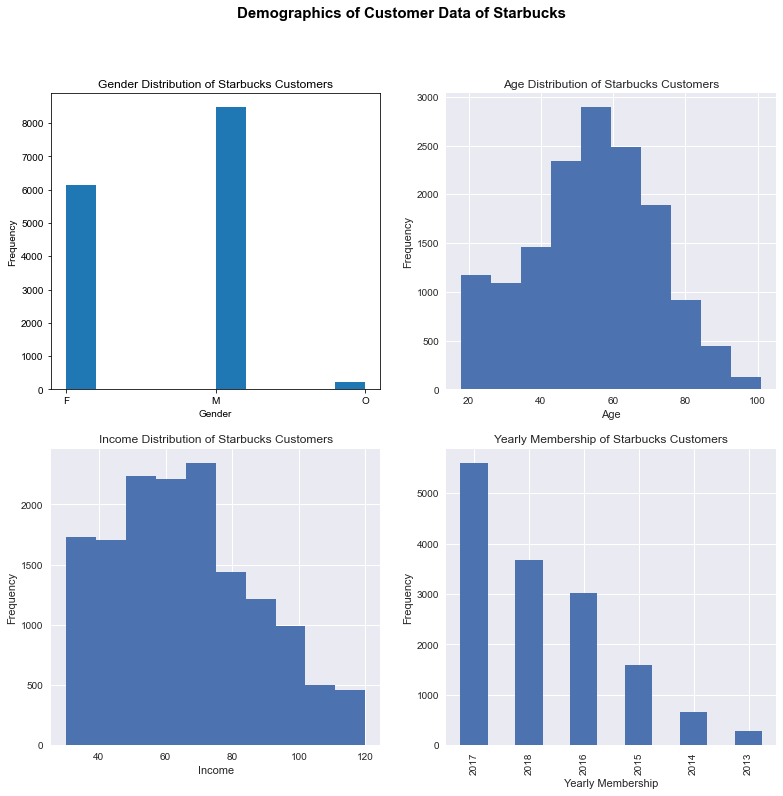

In [25]:
#Creating Subplots for distribution based on Gender,Age,Income and start year of membership for the cleaned Profile data
fig, ax = plt.subplots(2, 2, figsize=(13, 12))
fig.suptitle('Demographics of Customer Data of Starbucks', fontsize=15, weight='bold')

# GENDER BASED SUBPLOT
plt.subplot(2, 2, 1)
plt.hist(profile['gender']);
plt.style.use('seaborn');
plt.title('Gender Distribution of Starbucks Customers');
plt.xlabel("Gender");
plt.ylabel("Frequency");


# AGE BASED SUBPLOT
plt.subplot(2, 2, 2)
plt.hist(profile['age']);
plt.style.use('seaborn')
plt.title("Age Distribution of Starbucks Customers" );
plt.xlabel("Age");
plt.ylabel("Frequency");

# INCOME BASED  SUBPLOT
plt.subplot(2, 2, 3)
plt.hist(profile['income'] * 1E-3 );
plt.style.use('seaborn')
plt.title("Income Distribution of Starbucks Customers");
plt.xlabel("Income");
plt.ylabel("Frequency");


# BECAME A MEMBER OF STARBUCKS ON(YEAR) SUBPLOT
plt.subplot(2, 2, 4)
profile["start_year"].value_counts().plot(kind = 'bar'); 
plt.style.use('seaborn')
plt.title("Yearly Membership of Starbucks Customers");
plt.xlabel("Yearly Membership");
plt.ylabel("Frequency");

plt.show()

**Q3**: What is the average age of Starbucks Customers?

In [26]:
avg_age = profile['age'].describe()['mean']
print(f"The average age of starbucks customers: {avg_age:.2f}")

The average age of starbucks customers: 54.39


**Q4**: What is the average Income of Starbucks Customers?

In [27]:
avg_income = profile['income'].describe()['mean']
print(f"The average income of starbucks customers: {avg_income:.2f}")

The average income of starbucks customers: 65404.99


**Q5**: Which gender has the highest yearly membership?

In [28]:
# groupby start_year and gender to plot a graph
membership_year = profile.groupby(['start_year', 'gender'])["income"].count().reset_index()
highest_gender_index = (membership_year.groupby('start_year').idxmax().income)
membership_year.rename(columns={'income':'number of membership'}, inplace=True)
membership_year.loc[highest_gender_index]

,start_year,gender,number of membership
1,2013,M,197
4,2014,M,520
7,2015,M,905
9,2016,F,1509
13,2017,M,3067
16,2018,M,2312


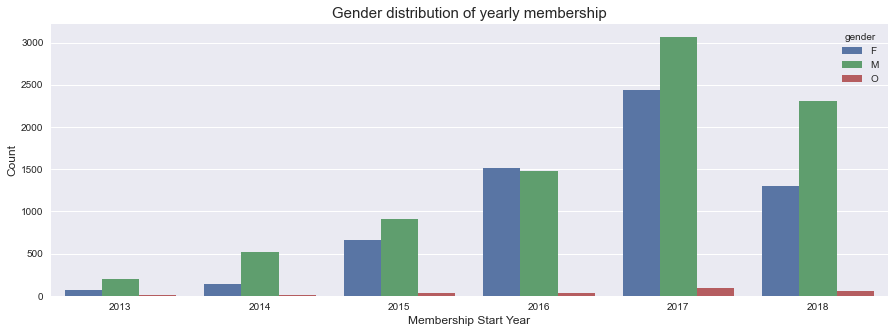

In [29]:
#plot a bar graph for membership program as a function of gender 
plt.figure(figsize=(15, 5))
sns.barplot(x='start_year', y='number of membership', hue='gender', data=membership_year);
plt.xlabel('Membership Start Year',fontsize = 12);
plt.ylabel('Count',fontsize = 12);
plt.title("Gender distribution of yearly membership", fontsize = 15)
plt.show()

**Q6**: Which gender has the highest annual income?

In [30]:
avg_income = profile.groupby('gender')['income'].mean()
avg_income

gender
F   71306.41
M   61194.60
O   63287.74
Name: income, dtype: float64

**Q7**: What is the distribution of event in transcripts?

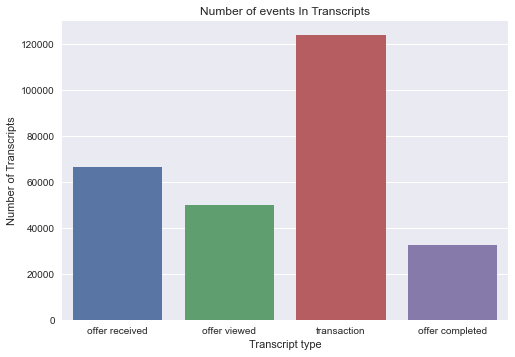

In [31]:
sns.countplot(transcript['event'])
plt.title('Number of events In Transcripts')
plt.ylabel('Number of Transcripts')
plt.xlabel('Transcript type')
plt.xticks(rotation = 0)
plt.show()

**Q8**: What is the percent of trasactions and offers in the event?

In [32]:
transaction_percentage = len(transcript[transcript['event']=='transaction'])/len(transcript)
offer_percentage = len(transcript[transcript['event']!='transaction'])/len(transcript)

print(f'The percentage of transaction in all events: {transaction_percentage*100:.2f}')
print(f'The percentage of offer in all events: {offer_percentage*100:.2f}')

The percentage of transaction in all events: 45.45
The percentage of offer in all events: 54.55


**Q9**: What are the types of offers : received, views, completed?

In [33]:
offers_df.event.value_counts()

offer received     66501
offer viewed       49860
offer completed    32444
Name: event, dtype: int64

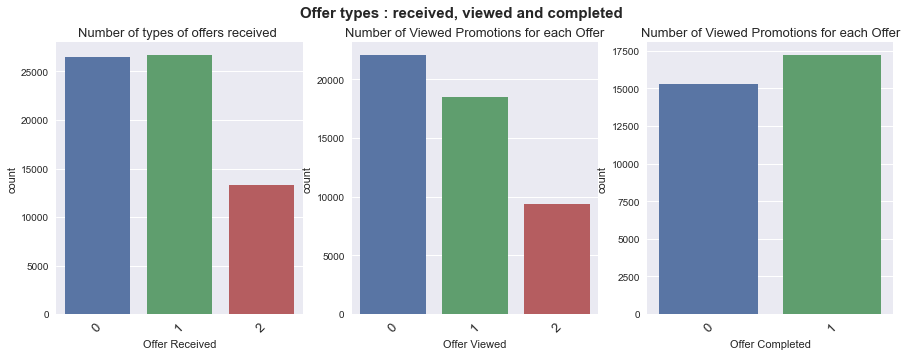

0 : bogo
1 : discount
2 : informational


In [34]:
offer_received = offers_df[offers_df["event"] == "offer received"]
offer_viewed = offers_df[offers_df["event"]== "offer viewed"]
offer_completed = offers_df[offers_df["event"] == "offer completed"]

# Visualize distribution of membership days grouped by success
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Offer types : received, viewed and completed', fontsize=15, weight='bold')

# Subplot for bogo offers
plt.subplot(1, 3, 1)
sns.countplot(x=offer_received['offer_type'])
plt.title('Number of types of offers received ', fontsize=13)
plt.xlabel('Offer Received')
plt.xticks(rotation = 45, fontsize=13)


# Subplot for discount offers
plt.subplot(1, 3, 2)
sns.countplot(x=offer_viewed['offer_type'])
plt.title('Number of Viewed Promotions for each Offer', fontsize=13)
plt.xlabel('Offer Viewed')
plt.xticks(rotation = 45, fontsize=13)

# Subplot for informational offers
plt.subplot(1, 3, 3)
sns.countplot(x=offer_completed['offer_type'])
plt.title('Number of Viewed Promotions for each Offer', fontsize=13)
plt.xlabel('Offer Completed')
plt.xticks(rotation = 45, fontsize=13)
plt.show()
i = 0
for offer_type in le2.inverse_transform([0, 1, 2]):
    print(f"{i} : {offer_type}")
    i += 1

**Q10**: What is the Income Distribution for the Offer Events?

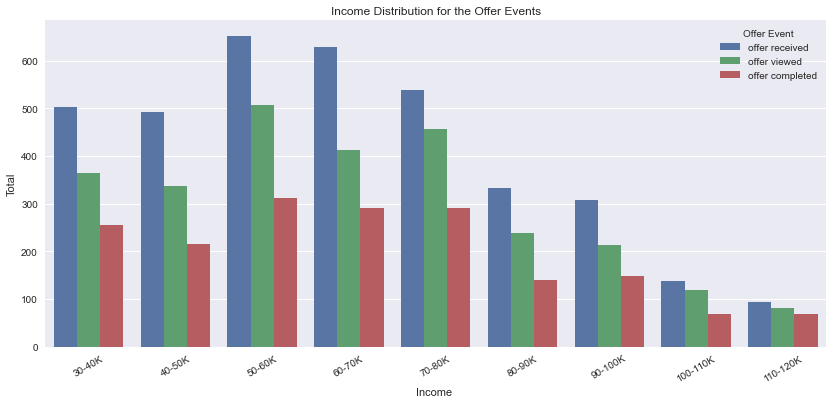

In [35]:
#Create a Income group Column cleaning by  segregation
offers_df['income_groups'] = pd.cut(x=profile["income"],
                                    bins=[30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000,  120000],
                                   labels =['30-40K','40-50K','50-60K','60-70K','70-80K','80-90K','90-100K','100-110K','110-120K'])

plt.figure(figsize=(14, 6))
sns.countplot(x=offers_df['income_groups'], hue="event", data=offers_df)
plt.title("Income Distribution for the Offer Events")
plt.ylabel('Total')
plt.xlabel('Income ')
plt.xticks(rotation = 30)
plt.legend(title='Offer Event')
plt.show();

**Q11**: What is the highest completed offer?

In [36]:
max_completion = offer_completed.offer_id.value_counts().values[0]
max_comp_offer_id = offer_completed.offer_id.value_counts().index[0]
print(f"Number of Completion: {max_completion}")
print(f"offer_id with maximum offers completed:{max_comp_offer_id}")
print(f"Original offer_id with maximum offers completed: {le1.inverse_transform([max_comp_offer_id])}")

Number of Completion: 5003
offer_id with maximum offers completed:9
Original offer_id with maximum offers completed: ['fafdcd668e3743c1bb461111dcafc2a4']


**Q12**: What is the lowest completed offer?

In [37]:
min_completion = offer_completed.offer_id.value_counts().values[-1]
min_comp_offer_id = offer_completed.offer_id.value_counts().index[-1]
print(f"Number of Completion: {min_completion}")
print(f"offer_id with maximum offers completed:{min_comp_offer_id}")
print(f"Original offer_id with maximum offers completed: {le1.inverse_transform([min_comp_offer_id])}")

Number of Completion: 3310
offer_id with maximum offers completed:4
Original offer_id with maximum offers completed: ['4d5c57ea9a6940dd891ad53e9dbe8da0']


## 5.Data Modelling


#### Metrics:

* It is a simple classification problem therefore, we will use accuracy to evaluate models.
* Comapre the correct predictions and total number of predicitons to determine the accuracy of the model and choose the best.

In order to compare other models we will use **lazypredict** library

Documentation of [lazypredict](https://lazypredict.readthedocs.io/en/latest/) library.

In [38]:
# dropping these columns because with null values, datetime,object,category datatypes
cols_to_drop = ['income_groups','amount','became_member_on' ,'event','reward_x']
offers_df = offers_df.drop(columns= cols_to_drop)

In [39]:
offers_df.columns

Index(['customer_id', 'time', 'offer_id', 'gender', 'age', 'income',
       'start_year', 'reward_y', 'difficulty', 'duration', 'offer_type',
       'email', 'mobile', 'social', 'web', 'bogo', 'discount',
       'informational'],
      dtype='object')

In [40]:
offers_df.head()

,customer_id,time,offer_id,gender,age,income,start_year,reward_y,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
0,6962,0,6,0,75,100000.00,2017,5.00,5.00,7.00,0,1.00,1.00,0.00,1.00,1.00,0.00,0.00
1,6962,6,6,0,75,100000.00,2017,5.00,5.00,7.00,0,1.00,1.00,0.00,1.00,1.00,0.00,0.00
3,6962,132,6,0,75,100000.00,2017,5.00,5.00,7.00,0,1.00,1.00,0.00,1.00,1.00,0.00,0.00
5,6962,168,5,0,75,100000.00,2017,0.00,0.00,3.00,2,1.00,1.00,1.00,0.00,0.00,0.00,1.00
6,6962,216,5,0,75,100000.00,2017,0.00,0.00,3.00,2,1.00,1.00,1.00,0.00,0.00,0.00,1.00


#### Supervised Learning (Classification)
The target column is **offer_type**. It will help to predict the correct **offer_type** to send to each customer.

In [41]:
X = offers_df.drop(columns=['offer_type', 'customer_id', 'offer_id'])
y = offers_df.offer_type

In [42]:
set(offers_df.offer_type)

{0, 1, 2}

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state =42)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [17:52<00:54, 18.27s/it]

[22:00:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [17:55<00:00, 35.86s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
AdaBoostClassifier                 1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
SVC                                1.00               1.00    None      1.00   
SGDClassifier                      1.00               1.00    None      1.00   
RidgeClassifierCV                  1.00               1.00    None      1.00   
RidgeClassifier                    1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00    None      1.00   
Perceptron                         1.00               1.00    None      1.00   
PassiveAggressiveClassifier        1.00 

Accuracy for test data are shown below. Nearly all of them give 100% accuracy. Therefore we can select any one of model. We selected AdaBoostClassifier.

In [44]:
print(predictions)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
AdaBoostClassifier                 1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
SVC                                1.00               1.00    None      1.00   
SGDClassifier                      1.00               1.00    None      1.00   
RidgeClassifierCV                  1.00               1.00    None      1.00   
RidgeClassifier                    1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00    None      1.00   
Perceptron                         1.00               1.00    None      1.00   
PassiveAggressiveClassifier        1.00 

### Evalute the model accuracy
Let's evalaute AdaBoostClassifier model.

In [45]:
print(f'Train Data Size: {X_train.shape[0]}')
print(f'Test Data Size: {X_test.shape[0]}')

Train Data Size: 119044
Test Data Size: 29761


In [46]:
X.columns

Index(['time', 'gender', 'age', 'income', 'start_year', 'reward_y',
       'difficulty', 'duration', 'email', 'mobile', 'social', 'web', 'bogo',
       'discount', 'informational'],
      dtype='object')

Select randomly one offer from test set.

In [47]:
X_test.iloc[12535,:]

time              360.00
gender              0.00
age                52.00
income          58000.00
start_year       2018.00
reward_y            2.00
difficulty         10.00
duration           10.00
email               1.00
mobile              1.00
social              1.00
web                 1.00
bogo                0.00
discount            1.00
informational       0.00
Name: 111310, dtype: float64

In [48]:
y_test.iloc[12535]

1

In [49]:
le2.inverse_transform([0, 1, 2])

array(['bogo', 'discount', 'informational'], dtype=object)

In [50]:
random_customer_data = list(X_test.iloc[12535,:])

First we trained model.

In [51]:
clf = KNeighborsClassifier(leaf_size=4, n_neighbors=21, p=1)
clf.fit(features, target)
clf.score(features, target)

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
clf.score(X, y)

In [ ]:
clf.predict(np.reshape(np.array(random_customer_data),(1,-1)))

The model has correctly predicted that the customer will likely respond discount offer type with an accuracy of 100 %.
Hence our model has good accuracy for prediction.

## 6.Conclusion

Different segments of customers react to offers differently.

The average age of starbucks customers is 54.39.

The count of male customers in low-income level is slightly higher than that of female.

the average salary of female is greater than male average salary, female spend less on starbucks than male.

Starbucks has more of the young people than those of the aged once.

The result of the offer_type was prediced succesfully by training a supervised classifier.

#### Improvement:
By using more data we can select the best classification algorithm. For the given data, below classifier model give best result. 

AdaBoostClassifier                   
BaggingClassifier                
XGBClassifier                      
SVC                                  
SGDClassifier                   
RidgeClassifierCV                  
RidgeClassifier                    
RandomForestClassifier             
QuadraticDiscriminantAnalysis      
Perceptron                      
PassiveAggressiveClassifier     
NuSVC                               
NearestCentroid                    
LogisticRegression                   
LinearSVC                          
LinearDiscriminantAnalysis          
KNeighborsClassifier               
GaussianNB                           
ExtraTreesClassifier                
ExtraTreeClassifier               
DecisionTreeClassifier             
CalibratedClassifierCV          
BernoulliNB                     
LGBMClassifier


## 7.Results
Customers are attracted to **BOGO and Discount** offers more as compared to Informational Offers. The buying behaviour of a customer are independent of its annual income.

Starbucks have more male customers than females and other gender.

Most of the classification model give best results for the given data.
